In [1]:
import datacube

In [2]:
dc = datacube.Datacube()

In [3]:
lat1,lon1 = -16.885611, 145.900562
lat2,lon2 = -16.917936, 145.944146

#x = dc.load(product='s1_gamma0_scene', lat=(lat1,lat2), lon=(lon1,lon2))

In [4]:
from unittest.mock import patch

In [5]:
import collections
GroupBy = collections.namedtuple('GroupBy', ['dimension', 'group_by_func', 'units', 'sort_key'])
# or datacube.api.query.GroupBy
fixed_time_grouper = GroupBy(dimension='time',
                       group_by_func=lambda ds: ds.time[0],
                       units='seconds since 1970-01-01 00:00:00',
                       sort_key=lambda ds: ds.time[0])

In [6]:
with patch('datacube.api.core.query_group_by', new=(lambda **x:fixed_time_grouper)):
    x = dc.load(product='s1_gamma0_scene', lat=(lat1,lat2), lon=(lon1,lon2), output_crs='EPSG:3577', resolution=(-25,25))

In [7]:
#x.vh.plot.imshow(col='time', col_wrap=3, vmin=0, vmax=0.5)

In [11]:
%matplotlib
x.vh.mean(dim='time').plot()

Using matplotlib backend: Qt5Agg


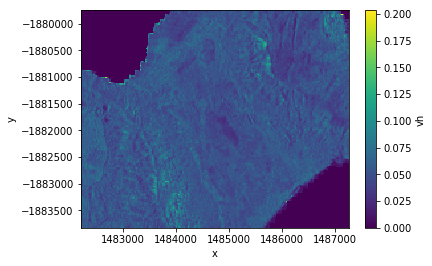

In [9]:
from matplotlib import pyplot as plt
plt.show()